In [1]:
import pandas as pd
import networkx as nx
from pathlib import Path
import matplotlib.pyplot as plt

import sys
sys.path.append("../../") # root-dir of the project
from src.features.util import calculate_key_figures

# Setup & Import

In [2]:
DATA_DIR = Path("../../data/raw/")
filename = "Following_Ignoring_Relationships_01052019_31052019.csv"

# use this output-path for saving figures
FIG_OUTPUT_PATH = Path("../../reports/figures/follows/")

In [3]:
relationships = pd.read_csv(DATA_DIR / filename, sep=';')

In [4]:
relationships.head()

ID_CommunityIdentity  ID_CommunityIdentityConnectedTo  \
0                  1778                           246490   
1                  5872                             5872   
2                  9030                            23875   
3                  9030                           508504   
4                 10569                            10569   

   ID_CommunityConnectionType  
0                           1  
1                           1  
2                           1  
3                           1  
4                           1

In [5]:
relationships.ID_CommunityConnectionType.value_counts()

ID_CommunityConnectionType
1    57117
2    29659
Name: count, dtype: int64

Rename the columns for convenience

In [6]:
relationships.columns = ["user_id", "target_user_id", "type"]

In [7]:
relationships.isnull().sum() / relationships.isnull().count()

user_id           0.0
target_user_id    0.0
type              0.0
dtype: float64

No missing values which is nice

Ignore the blocked_user columns and drop it because it will not contain any information

In [8]:
following_relationships = relationships[relationships['type'] == 1]
ignoring_relationships = relationships[relationships['type'] == 2]
following_relationships = following_relationships.drop(columns=['type'])
ignoring_relationships = ignoring_relationships.drop(columns=['type'])

In [9]:
following_relationships.head()

user_id  target_user_id
0     1778          246490
1     5872            5872
2     9030           23875
3     9030          508504
4    10569           10569

# Sample

In [10]:
following_relationships_sample = following_relationships.sample(n=5000)

In [11]:
ignoring_relationships = ignoring_relationships.sample(n=2000)

# Analysis

## Construct graphs

In [12]:
G_follow = nx.from_pandas_edgelist(following_relationships_sample,
                            source='user_id',
                            target='target_user_id',
                            create_using=nx.Graph())

G_ignore = nx.from_pandas_edgelist(ignoring_relationships,
                                   source='user_id',
                                   target='target_user_id',
                                   create_using=nx.Graph())

## Calculate key figures

In [15]:
key_figures_follow = calculate_key_figures(G_follow, display=True)

Number of nodes: 4563
Number of edges: 4958
Average degree: 2.1731317115932502
Average clustering coefficient: 0.004478020743447816
Degree assortativity coefficient: -0.06406441395671378


In [16]:
key_figures_ignore = calculate_key_figures(G_ignore, display=True)

Number of nodes: 2013
Number of edges: 2000
Average degree: 1.987083954297069
Average clustering coefficient: 0.0
Degree assortativity coefficient: -0.30607763093510554


## Draw Graphs

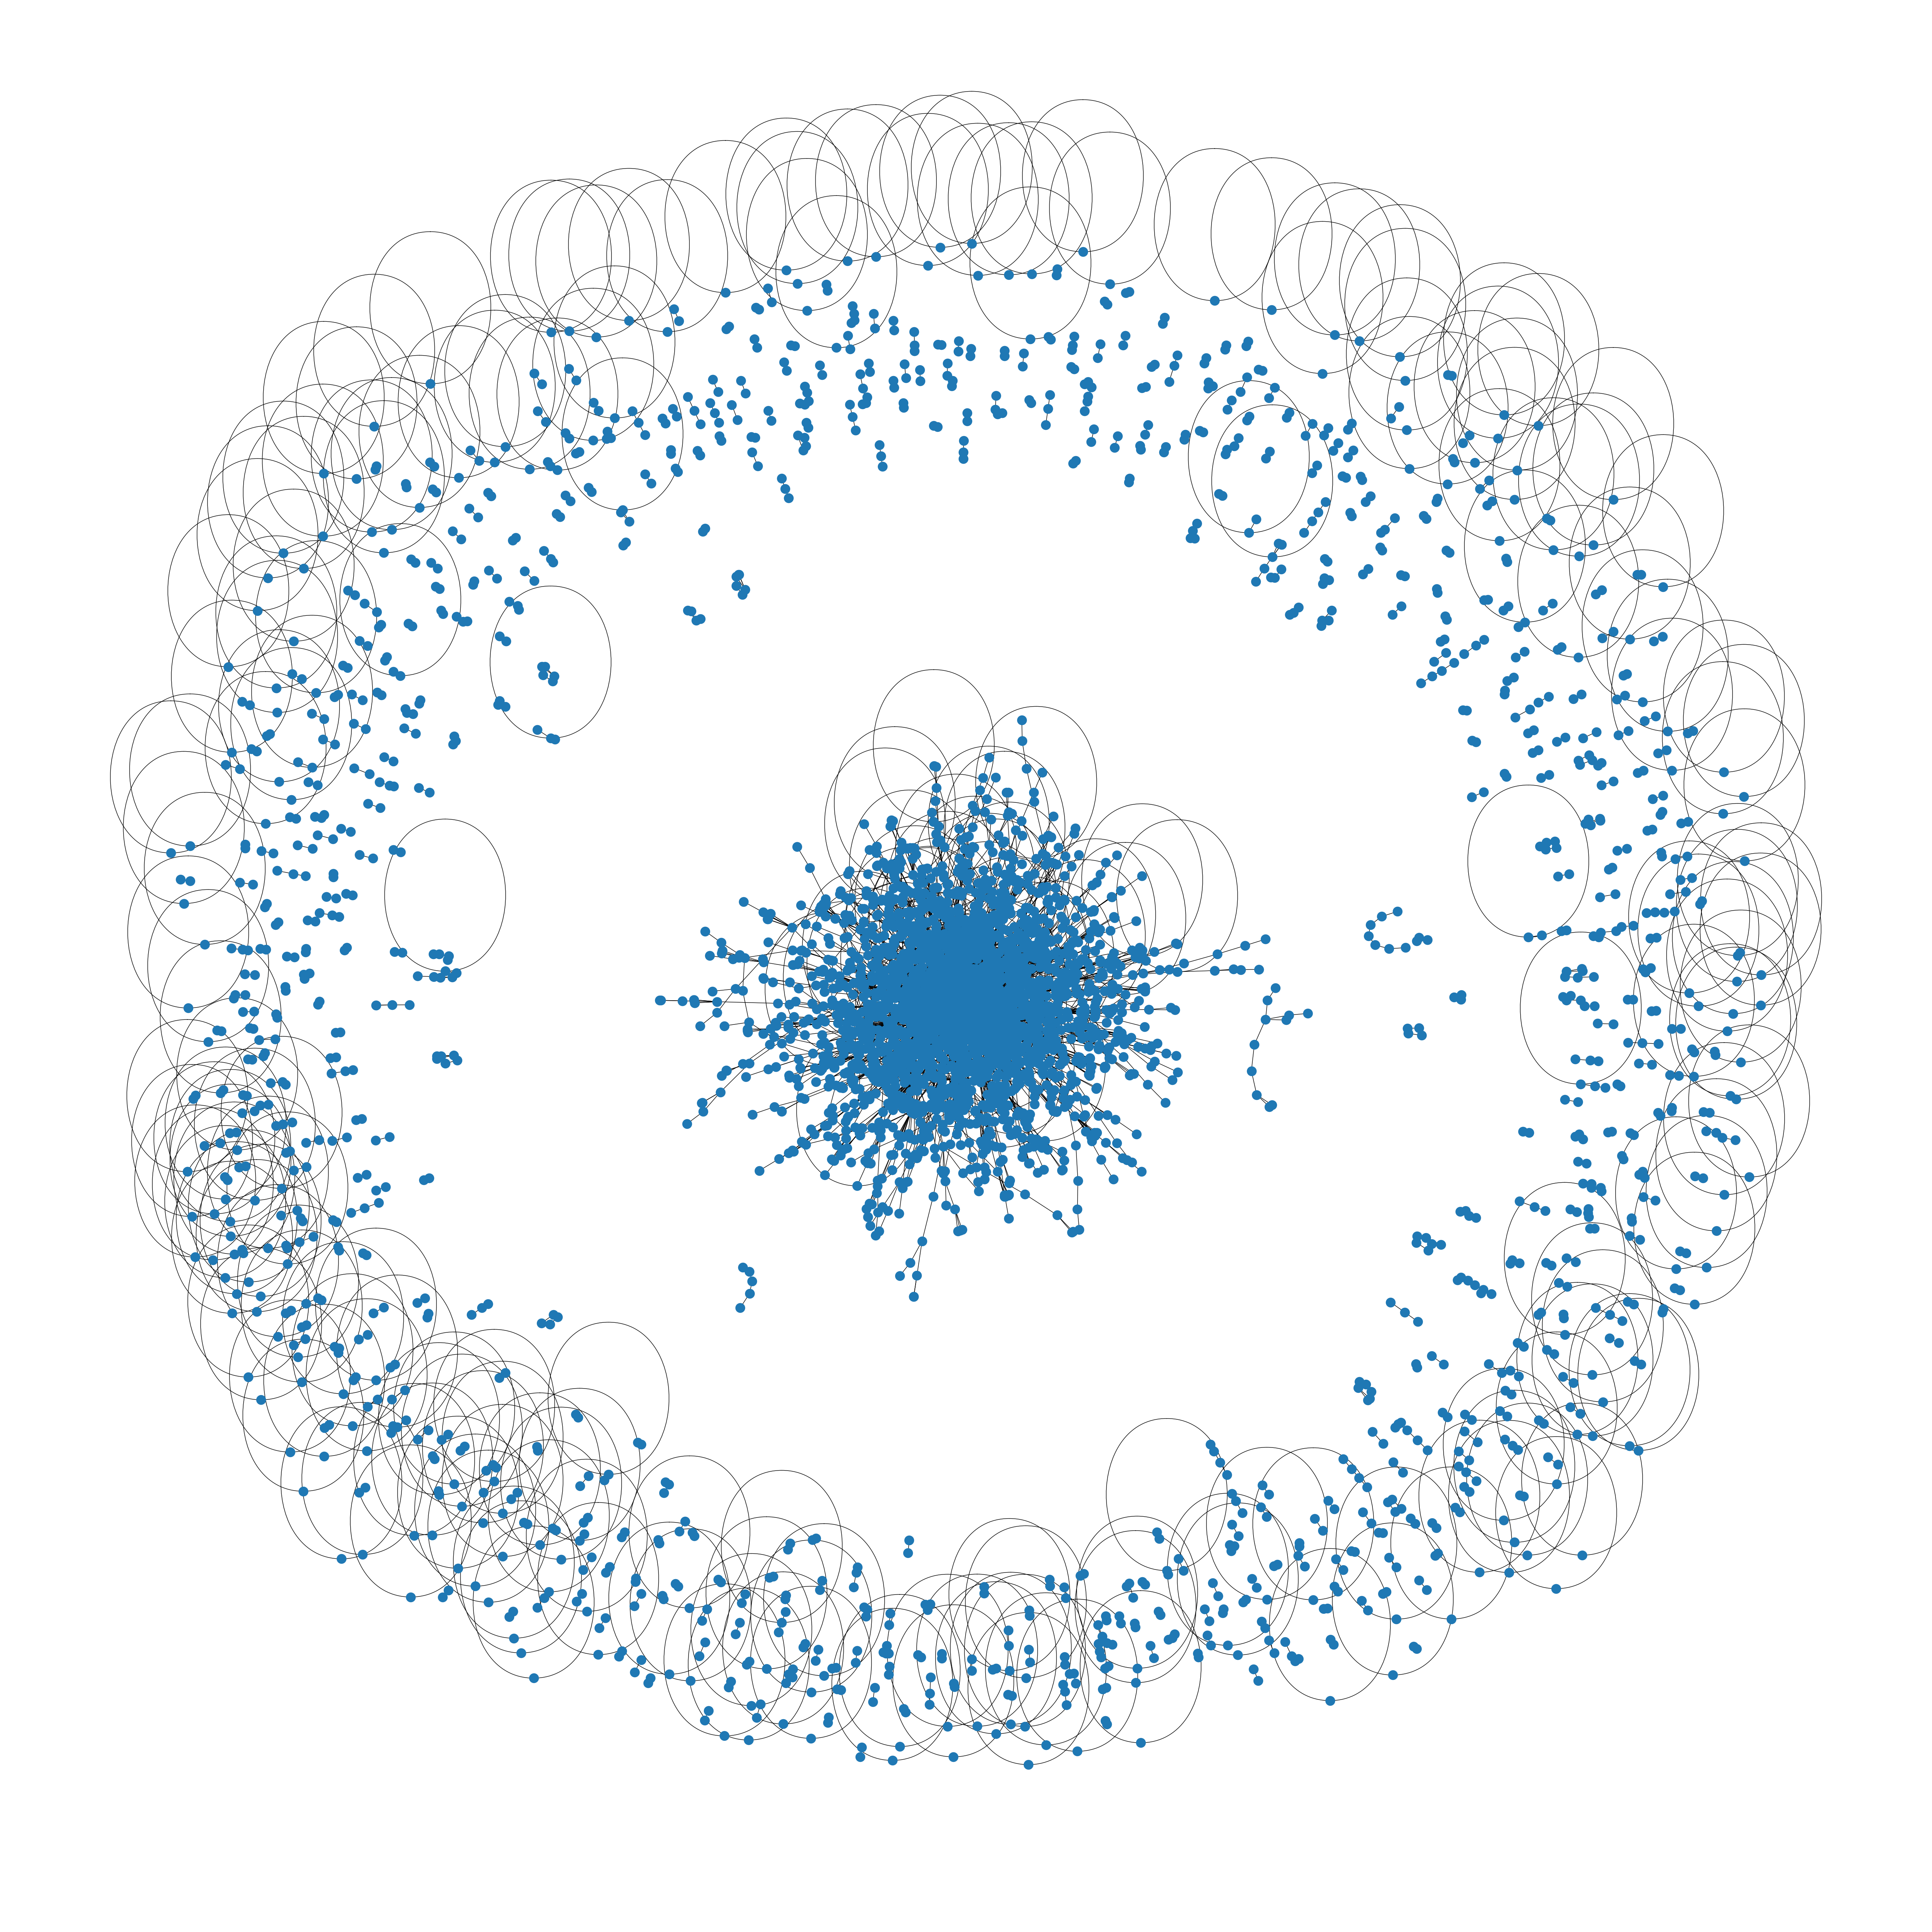

In [17]:
fig = plt.figure(figsize=(50,50))
nx.draw_spring(G_follow)
plt.savefig(FIG_OUTPUT_PATH / "follows_5000n.png", format="PNG")
plt.show()

In [ ]:
fig = plt.figure(figsize=(50,50))
nx.draw_spring(G_ignore)
plt.savefig(FIG_OUTPUT_PATH / "ignore_2000n.png", format="PNG")
plt.show()

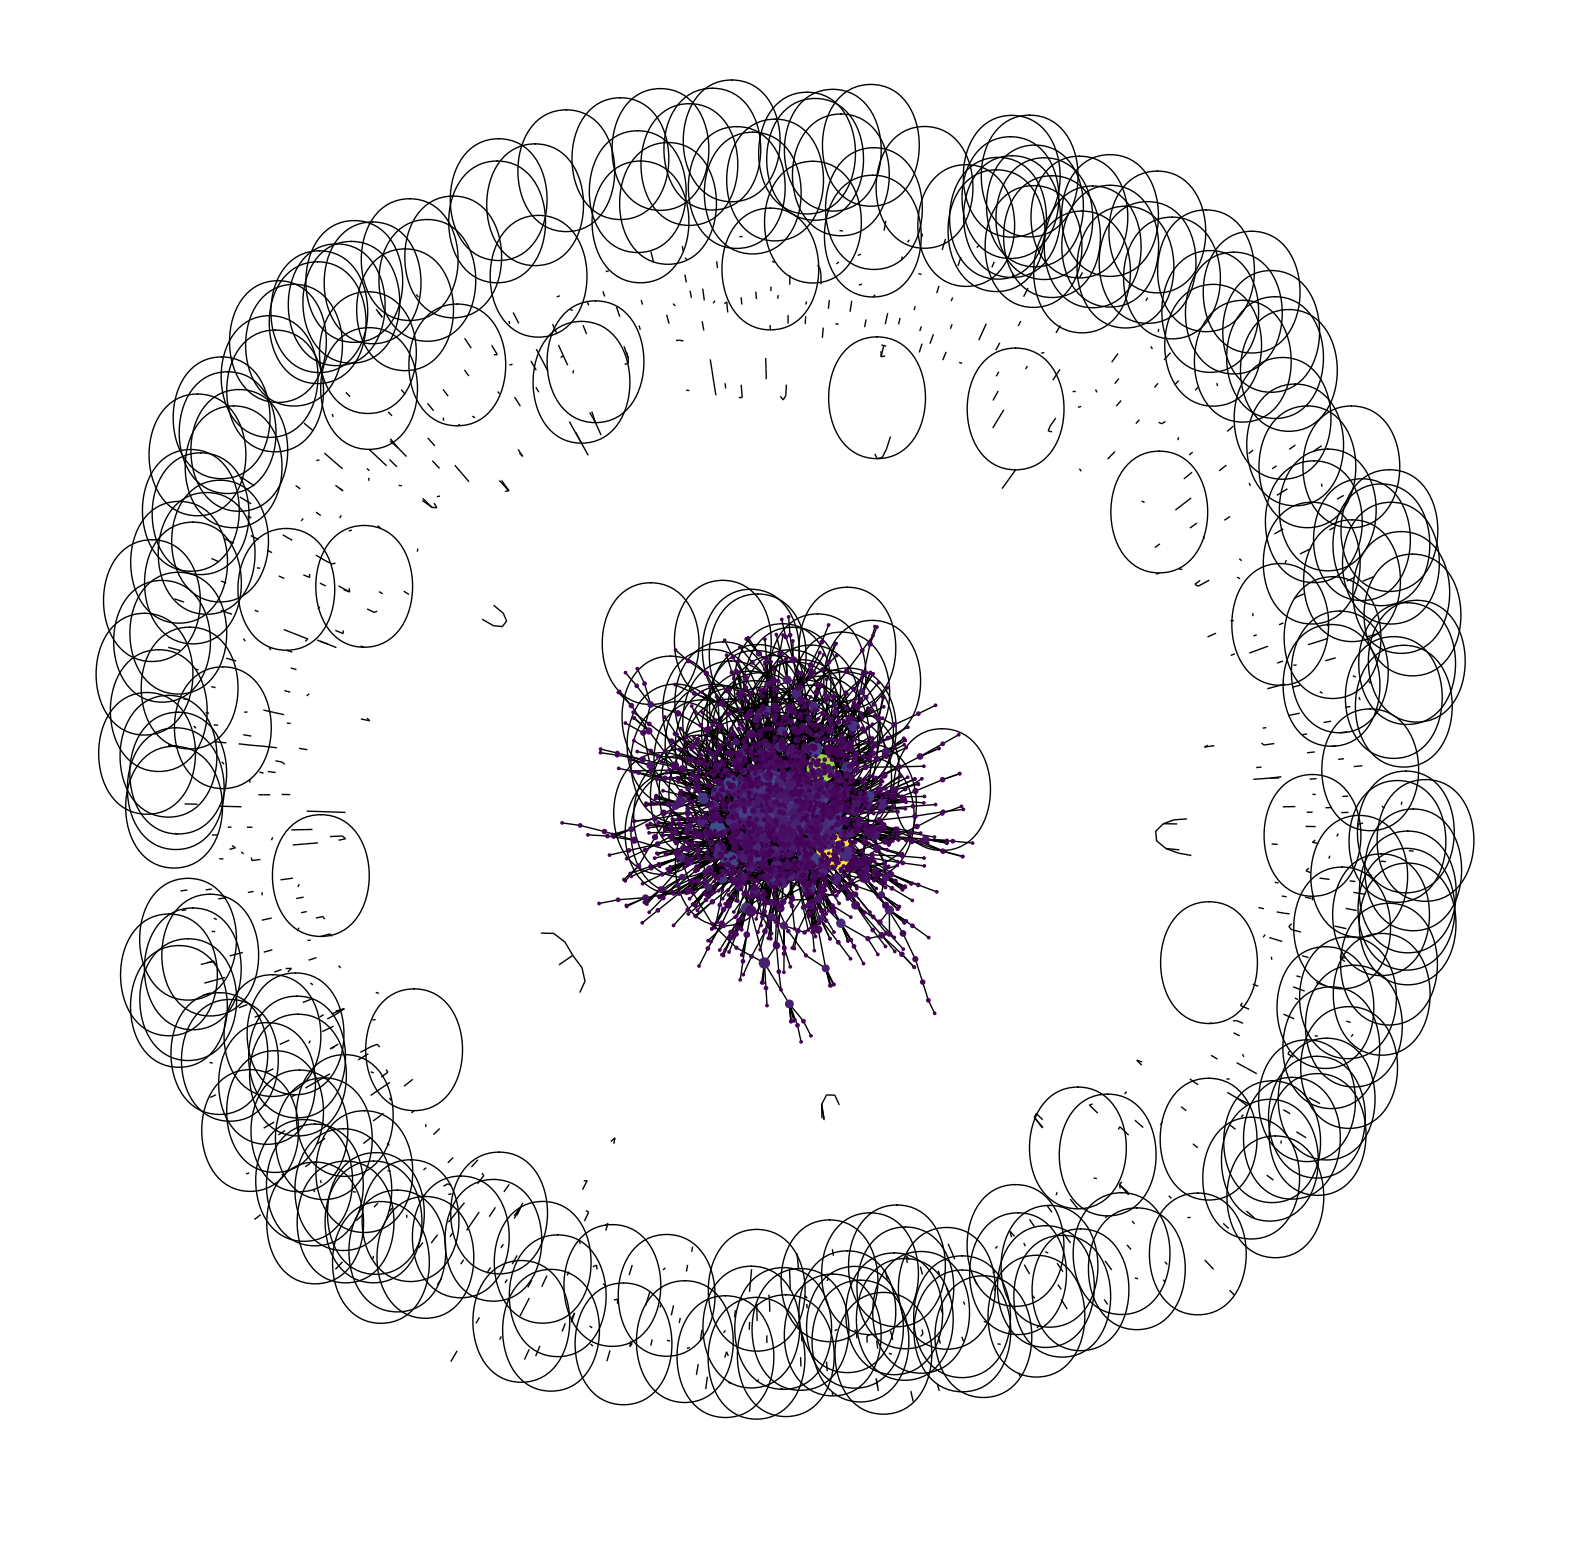

In [58]:
pos = nx.spring_layout(G_
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
# plt.savefig(FIG_OUTPUT_PATH / "G_sample_5000.png, format="PNG")
plt.show()